## Data Generation

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import rand, randn
import matplotlib.pyplot as plt

In [2]:
n, d, k = 100, 2, 2

In [4]:
X = rand(n, d)

In [9]:
means = [rand(d)  for _ in range(k)]

S = np.diag(rand(d,d).diagonal())

sigmas = [S]*k

print(means)
print(sigmas)

[array([ 0.28599694,  0.1622372 ]), array([ 0.71482396,  0.71580824])]
[array([[ 0.69245002,  0.        ],
       [ 0.        ,  0.70516044]]), array([[ 0.69245002,  0.        ],
       [ 0.        ,  0.70516044]])]


## Data Manipulation

In [14]:
def compute_log_estimator(X, mean, std):
    dxm = X - mean
    exponent = -0.5 * np.sum(dxm * np.dot(dxm, np.linalg.inv(std)), axis=1)
    return exponent - np.log(2 * np.pi) * (d / 2) - 0.5 * np.log(np.linalg.det(std))

In [15]:
log_ps = [compute_log_estimator(X, m, s) for m, s in zip(means, sigmas)]

In [16]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

[1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1
 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1
 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1]


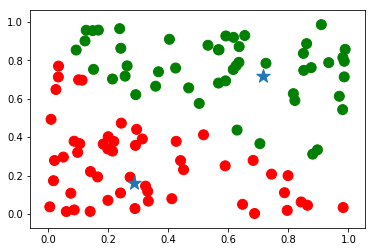

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=np.array(['red', 'green'])[assignments], s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()